In [1]:
import signac
import sys
import importlib
sys.path.append("../")
import tg_analysis
importlib.reload(tg_analysis)
from tg_analysis import get_tg_data
import signac
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as cm

In [2]:
data_path = "/Users/mike/Data/rxn_sweep_boeing_20200306"
project = signac.get_project(data_path)
jobs = project.find_jobs({"$and":[{"activation_energy":1.0, "deltaT": 0.0,"sec_bond_weight":1.0,}]})

0.9934221135707861
0.997946395619984
0.5988279661632199
0.9862136495958466
0.9859838220996929


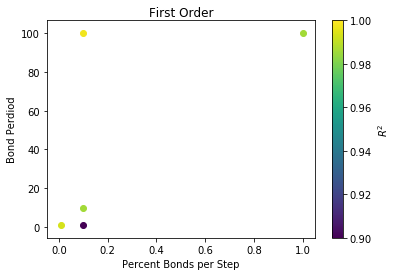

In [30]:
jobs = project.find_jobs({"$and":[{"activation_energy":1.0, "deltaT": 0.0,"sec_bond_weight":1.0,}]})

model_name = "First Order" 

R2s = []
for job in jobs:
    try:
        print(job.doc.FO_model_R2)
        R2s.append(job.doc.FO_model_R2)
    except(AttributeError):
        continue
norm = cm.colors.Normalize(vmax=max(R2s), vmin=min(R2s))
norm = cm.colors.Normalize(vmax=1, vmin=0.9)

                           
for job in jobs:
    try:
        plt.scatter(job.sp.percent_bonds_per_step, job.sp.bond_period, c=job.doc.FO_model_R2, norm=norm)
    except(AttributeError):
        continue
cbar = plt.colorbar()
plt.title(model_name)
plt.xlabel("Percent Bonds per Step")
plt.ylabel("Bond Perdiod")
cbar.set_label(r"$R^2$")

0.7651763673348718
0.7736682031871064
0.8111636617001013
0.7411859036859113
0.950278428031076
0.8560530145344389
0.6784031372646545


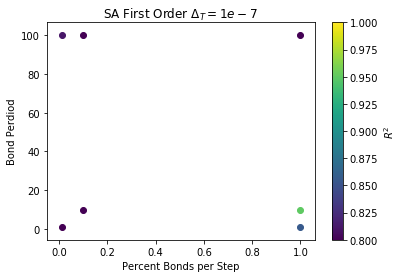

In [33]:
jobs = project.find_jobs({"$and":[{"activation_energy":2.0, "deltaT": 1e-07,"sec_bond_weight":2.0,}]})

model_name = r"SA First Order $\Delta_T = 1e-7$ "


R2s = []
for job in jobs:
    try:
        print(job.doc.SAFO_model_R2)
        if job.doc.SAFO_model_R2 is not None:
            R2s.append(job.doc.SAFO_model_R2)
    except(AttributeError):
        continue
norm = cm.colors.Normalize(vmax=max(R2s), vmin=min(R2s))
norm = cm.colors.Normalize(vmax=1, vmin=0.8)


for job in jobs:
    try:
        if job.doc.SAFO_model_R2 is not None:
            plt.scatter(job.sp.percent_bonds_per_step, job.sp.bond_period, c=job.doc.SAFO_model_R2, norm=norm)
    except(AttributeError):
        continue
cbar = plt.colorbar()
plt.title(model_name)
plt.xlabel("Percent Bonds per Step")
plt.ylabel("Bond Perdiod")
cbar.set_label(r"$R^2$")

0.9621996440906739
0.6796284838174662
0.7720521540984132
0.8540185878410647
0.9619432986433316
0.7632809816206971
0.6726912025713717
0.8194725679936228


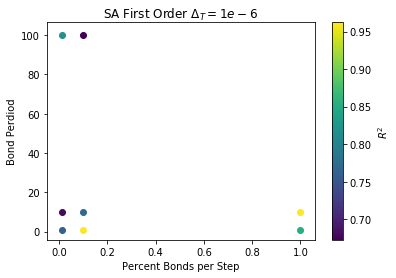

In [27]:
jobs = project.find_jobs({"$and":[{"activation_energy":2.0, "deltaT": 1e-06,"sec_bond_weight":2.0,}]})

model_name = r"SA First Order $\Delta_T = 1e-6$ "


R2s = []
for job in jobs:
    try:
        print(job.doc.SAFO_model_R2)
        if job.doc.SAFO_model_R2 is not None:
            R2s.append(job.doc.SAFO_model_R2)
    except(AttributeError):
        continue
norm = cm.colors.Normalize(vmax=max(R2s), vmin=min(R2s))
                           
for job in jobs:
    try:
        if job.doc.SAFO_model_R2 is not None:
            plt.scatter(job.sp.percent_bonds_per_step, job.sp.bond_period, c=job.doc.SAFO_model_R2, norm=norm)
    except(AttributeError):
        continue
cbar = plt.colorbar()
plt.title(model_name)
plt.xlabel("Percent Bonds per Step")
plt.ylabel("Bond Perdiod")
cbar.set_label(r"$R^2$")

0.815972176820895
0.8200491796500474
0.8030701262707409
0.7793278936030387
0.8105300522214115


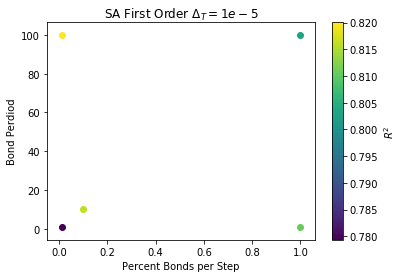

In [28]:
jobs = project.find_jobs({"$and":[{"activation_energy":2.0, "deltaT": 1e-05,"sec_bond_weight":2.0,}]})

model_name = r"SA First Order $\Delta_T = 1e-5$"


R2s = []
for job in jobs:
    try:
        print(job.doc.SAFO_model_R2)
        if job.doc.SAFO_model_R2 is not None:
            R2s.append(job.doc.SAFO_model_R2)
    except(AttributeError):
        continue
norm = cm.colors.Normalize(vmax=max(R2s), vmin=min(R2s))
                           
for job in jobs:
    try:
        if job.doc.SAFO_model_R2 is not None:
            plt.scatter(job.sp.percent_bonds_per_step, job.sp.bond_period, c=job.doc.SAFO_model_R2, norm=norm)
    except(AttributeError):
        continue
cbar = plt.colorbar()
plt.title(model_name)
plt.xlabel("Percent Bonds per Step")
plt.ylabel("Bond Perdiod")
cbar.set_label(r"$R^2$")

In [36]:
jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":80}})

R2s = []
for job in jobs:
    try:
        print(job.doc.SAFO_model_R2)
        if job.doc.SAFO_model_R2 is not None:
            R2s.append((job.doc.SAFO_model_R2, job._id))
    except(AttributeError):
        continue
    



0.7980040456285902
None
None
None
None
None
None
0.44563454201587993
None
0.8030701262707409
0.7755746375129551
0.9376779813753262
0.6306277765369124
None
None
0.9268315621186332
0.8657412610566967
0.975509757913332
None
None
None
0.9871254815524616
-22.017274568490212
0.9619432986433316
None
None
None
None
0.9080961852709566
None
None
-7.948087917593892
0.9755182293473988
0.8988354573779738
0.9689821502394572
0.9001598788198214
0.7411859036859113
0.9981833175178965
None
0.6726912025713717
None
0.9243713615125684
0.6784031372646545
None
0.6320341142599265
None
0.8814683017029115
None
0.9994847774386356
0.7736682031871064
None
None
0.964489118511275
None
None
None
None
0.9781754896750929
None
0.999587006350801
None
0.9247666390624152
None
0.9209740489488
None
0.9242429293611834
None
0.6796284838174662
0.9985004723005207
-3.699947828224121
0.637029068377317
None
0.8923887796633486
None
-5.721125178305579
None
0.9370002916062788
0.7823646502422926
0.907127253688643
None
0.9621996440906739

In [61]:
[_[1] for _ in sorted(R2s)[-10:]]

['9633171384b9b55d58970b72a58baf16',
 '8c929cbd2a02cb89067948f99dbd04f0',
 '78093e821670cd9cc7259ee9b331cb2b',
 '65c92204ac6223a44c5ea9f34b66f043',
 '04e1c6a54ace24892564e062855f62a2',
 'f665ff5e8e67f72caf87b7d23484e3a1',
 'f4027fc7a645fbc9dbbb07d298ec55ec',
 '2b3cba7d5961ccc24e18d3978940303e',
 'f7ddcd578917476c10a87a5cd62a569d',
 'c0411b8524f9c3fb532f6b160d379dc0']

In [65]:
jobs = project.find_jobs(doc_filter={"cure_percent":{"$gte":80}})

R2s = []
for job in jobs:
    try:
        if job.doc.SAFO_model_R2 is not None:
            R2s.append((job.doc.SAFO_model_R2, job._id))
    except(AttributeError):
        continue
    
top_ten = [_[1] for _ in sorted(R2s)[-10:]]
for job in jobs:
    if job._id in top_ten:
        print("-----------")
        print(job._id)
        print("R2 SAFO", job.doc.SAFO_model_R2)
        print("Ea", job.sp.activation_energy)
        print("deltaT", job.sp.deltaT)
        print("sec_bond_weight", job.sp.sec_bond_weight)
        print("% bonds per step" ,job.sp.percent_bonds_per_step)
        print("bond period", job.sp.bond_period)

-----------
8c929cbd2a02cb89067948f99dbd04f0
R2 SAFO 0.9871254815524616
Ea 2.0
deltaT 0.0001
sec_bond_weight 1.0
% bonds per step 1.0
bond period 100
-----------
65c92204ac6223a44c5ea9f34b66f043
R2 SAFO 0.9981833175178965
Ea 5.0
deltaT 0.0001
sec_bond_weight 1.0
% bonds per step 0.1
bond period 1
-----------
f4027fc7a645fbc9dbbb07d298ec55ec
R2 SAFO 0.9994847774386356
Ea 5.0
deltaT 0.0001
sec_bond_weight 1.0
% bonds per step 0.01
bond period 1
-----------
f7ddcd578917476c10a87a5cd62a569d
R2 SAFO 0.999587006350801
Ea 5.0
deltaT 0.0001
sec_bond_weight 1.0
% bonds per step 0.01
bond period 10
-----------
04e1c6a54ace24892564e062855f62a2
R2 SAFO 0.9985004723005207
Ea 5.0
deltaT 0.0001
sec_bond_weight 1.0
% bonds per step 1.0
bond period 10
-----------
78093e821670cd9cc7259ee9b331cb2b
R2 SAFO 0.9888327835820786
Ea 2.0
deltaT 0.0001
sec_bond_weight 1.0
% bonds per step 0.1
bond period 10
-----------
2b3cba7d5961ccc24e18d3978940303e
R2 SAFO 0.9994937829192911
Ea 5.0
deltaT 0.0001
sec_bond_weig

In [64]:
import pandas as pd
import signac
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from collections import OrderedDict
%matplotlib inline
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
path = "/home/mikehenry/epoxy-stuff/files_to_send_20200306"
project = signac.get_project(path)
jobs = project.find_jobs(filter={"bond": True}, doc_filter={"cure_percent":{"$gte":80}})
exp_data = np.load("../exp_data.npz")
doc, pa, sa, ta = exp_data["arr_0"], exp_data["arr_1"], exp_data["arr_2"], exp_data["arr_3"]
file_path = "../exp_data/Mike_Edits_Janisse_T44_NIR_Concentrations.xlsx"
sheets = pd.read_excel(file_path, sheet_name=None, skiprows=[0,1], header=None)
first_sheet = sheets["Sheet6"]
first_sheet = first_sheet.convert_objects(convert_numeric=True).dropna()
scale_factor = first_sheet[4].max()
doc = np.asanyarray(first_sheet[1])/100
pa = np.asanyarray(first_sheet[4]/scale_factor)
sa = np.asanyarray(first_sheet[5]/scale_factor)
for job in jobs:
    if job._id in top_ten:
        try:
            df = pd.read_csv(job.fn("_test_species.log"), delimiter="\t")
        except(FileNotFoundError):
            continue
        cure_fractions = np.asarray(df["#doc"])
        primaryA_cnts = np.asarray(df["primaryA"]) # 0
        secondaryA_cnts = np.asarray(df["secondaryA"]) # 1
        ternaryA_cnts = np.asarray(df["ternaryA"]) # 2 
        quarternaryA_cnts = np.asarray(df["quarternaryA"]) # 3
        fivernaryA_cnts = np.asarray(df["fivernaryA"]) # 4
        scale_factor = primaryA_cnts[0]*2
        primaryA_cnts=primaryA_cnts/scale_factor # 0
        secondaryA_cnts=secondaryA_cnts/scale_factor # 1
        ternaryA_cnts=ternaryA_cnts/scale_factor # 2
        quarternaryA_cnts=quarternaryA_cnts/scale_factor # 3
        fivernaryA_cnts=fivernaryA_cnts/scale_factor # 4
        P_high = primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts
        P_low =  primaryA_cnts*2+secondaryA_cnts+ternaryA_cnts*0
        S_high = secondaryA_cnts + ternaryA_cnts*2 + quarternaryA_cnts
        S_low =  secondaryA_cnts + ternaryA_cnts*0 +quarternaryA_cnts
        T_high = ternaryA_cnts+quarternaryA_cnts+fivernaryA_cnts*2
        T_low = quarternaryA_cnts+fivernaryA_cnts*2

        plt.figure(dpi=300)
        plt.plot(cure_fractions, P_high, color='#1f77b4', linestyle=":", label="high")
        plt.plot(cure_fractions, P_low, color='#1f77b4', linestyle="--", label="low")
        #plt.plot(cure_fractions, T_high, color="#2ca02c")
        #plt.plot(cure_fractions, T_low, color="#2ca02c")
        plt.plot(cure_fractions, S_high, color="#ff7f0e", linestyle=":")
        plt.plot(cure_fractions, S_low, color="#ff7f0e", linestyle="--")
            #plt.fill_between(cure_fractions, S_low, S_high, label="Secondary",hatch="|||", alpha = 0.5, color="#ff7f0e")
            #plt.fill_between(cure_fractions, T_low, T_high, label="Tertiary",hatch="///", alpha = 0.5, color="#2ca02c")
            #plt.fill_between(cure_fractions, P_low, P_high, label="Primary",hatch="|", alpha = 0.8, color='#1f77b4')

        plt.plot(doc,pa, color='#1f77b4', linestyle='-', label="exp")
        plt.plot(doc,sa, color='#ff7f0e', linestyle='-')
        #plt.plot(doc,ta, color='#2ca02c', linestyle='--')
        primary = mpatches.Patch(color='#1f77b4', label='Primary Amine')
        seconday = mpatches.Patch(color='#ff7f0e', label='Secondary Amine')
        exp = mlines.Line2D([], [], color='grey', linestyle='-', label="Experiment Ref. XX")
        high = mlines.Line2D([], [], color='grey', linestyle=':', label="Simulation High Count")
        low = mlines.Line2D([], [], color='grey', linestyle='--', label="Simulation Low Count")
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys(), prop={'size': 15})
        plt.legend(handles=[primary,seconday,exp, low, high])
        #plt.title("activation_energy: {} \n bond_period: {} deltaT: {} percent_bonds_per_step: {} \n sec_bond_weight: {}".format(job.sp.activation_energy,
        #                                             job.sp.bond_period,
        #                                             job.sp.deltaT,
        #                                            job.sp.percent_bonds_per_step,
        #                                            job.sp.sec_bond_weight),
        #                                            )

        plt.xlabel("Degree of Cure", size=15)
        plt.ylabel("Normalized Concentration", size=15)
        plt.xlim(0,1)
        plt.show()

LookupError: Unable to determine project id for path '/home/mikehenry/epoxy-stuff/files_to_send_20200306'.